<a href="https://colab.research.google.com/github/MichaelZuppas/W23GEOG_Mzuppas/blob/main/HW2/HW2-Stats_Philly_Parks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 : Summary statistics - For GEOG271

**By Emmanuel Chinkaka**

***University of Delaware***


This homework performs strictly an exploratory analysis of the data

Consult the class demo noteboo for more: https://github.com/EmmanuelChinkaka/W24-GEOG271-Geographic-Data-Analysis-/blob/main/NEW_DEMO/Descriptive_Stats.ipynb

**important**
turn in the notebook by uploading it to your github repository in a folder called HW2. Before you upload the notebook make sure you
- click above: Runtime -> Restart and run all

this will assure that your notebook has no bugs due to running the cells of code out of order.


**This assigment explores the Philadephia parks data**

In [1]:
# Importing package

import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read in the data about the Philly parks**

you can find the data at http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv
**Copy the URL above and use it to load the data**

In [3]:
# Reading the Phylly's park data from the URL baove
pparks = pd.read_csv('http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv')

In [4]:
# get the info and the statistical description of the dataframe
pparks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 508 non-null    int64  
 1   PUBLIC_NAME              508 non-null    object 
 2   PARENT_NAME              508 non-null    object 
 3   NESTED                   508 non-null    object 
 4   OFFICIAL_NAME            285 non-null    object 
 5   LABEL                    507 non-null    object 
 6   ALIAS                    352 non-null    object 
 7   DPP_ASSET_ID             508 non-null    int64  
 8   ADDRESS_911              500 non-null    object 
 9   ZIP_CODE                 508 non-null    int64  
 10  ADDRESS_BRT              427 non-null    object 
 11  ALIAS_ADDRESS            428 non-null    object 
 12  ACREAGE                  508 non-null    float64
 13  PROPERTY_CLASSIFICATION  508 non-null    object 
 14  PPR_USE                  5

In [5]:
# show the shape of the parks file dataframe
pparks.shape

(508, 25)

In [6]:
# show the column names in the dataframe
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS_911', 'ZIP_CODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_PROG_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [7]:
# show the beginning of the dataframe (the first 5 rows)
pparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_PROG_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,Joseph O'Connor Memorial Pool,1903,400 S TANEY ST,19146,...,14,5;7,2,9;17,Y,Y,Y,Markward site includes the O'Connor Pool,25871.441406,1094.402639
1,2,Schuylkill Banks,Schuylkill Banks,N,NaN,Schuylkill Banks,NaN,2794,2425 CHESTNUT ST,19103,...,10;14,5;7,2;5,9;17,Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.171875,9300.670275
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,...,14,"5, 7",2,9,Y,Y,N,NaN,27216.929688,799.048584
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,...,6,2,6,15,Y,Y,N,NaN,78515.335938,1585.376114
4,5,Robert A Borski Park,Robert A Borski Park,N,Robert A. Borski Park,Borski,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,...,7,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,72926.187500,1304.901416


In [8]:
# show the end of the dataframe (the last 5 rows)
pparks.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_PROG_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
503,504,61st and Cobbs Creek Park,Cobbs Creek Park,Y,NaN,61st and Cobbs Creek,,3481,61ST & COBBS CREEK,19143,...,12,8,3,18,Y,Y,N,NaN,35596.937500,1037.395645
504,505,Lawrence Court Breezeways,Lawrence Court Breezeways,N,NaN,Lawrence Breezeway,Lawrence Court Walkways,3867,335 LAWRENCE CT,19106,...,15,5,1,6,N,Y,N,NaN,1945.863281,394.259401
505,506,Fernhill Park,Fernhill Park,N,NaN,Fernhill,,833,4600 MORRIS ST,19144,...,5,4,8,39,Y,Y,N,NaN,294423.921875,4327.841898
506,507,School District Area (Gorgas),Susan Gorgas Park,Y,NaN,NaN,NaN,0,NaN,19128,...,4,4,4,5,N,N,N,1927 Transferred to SD to manage and maintain.,58382.015625,986.309218
507,508,Susan Gorgas Park,Susan Gorgas Park,Y,Susan Gorgas Park,Gorgas,NaN,803,6424 RIDGE AVE,19128,...,4,4,4,5,Y,Y,N,NaN,87612.011719,1246.794516


## meausre the central tendency of the Philly park sizes
measure the mean and the median and compare them

In [9]:
meanps = pparks['ACREAGE'].mean()
medianps = pparks['ACREAGE'].median()

In [10]:
# show the mean and median sizes of the dataframe
# are they the same?
meanps
medianps

# Printing the mean and median
print("The mean is ", meanps)
print("The median is", medianps)



The mean is  19.95358826312992
The median is 3.599560195


1. what can you conclude from the values of the mean and median you extracted? (discuss in a text cell below)

2. What can you say about the distribution of the ACREAGE variable in the data?





1) The mean being around 19.95 and median being roughly 3.59 means that in the data there must be some outliers on the higher end, the median being around 3.6 means that at least half of the properties have an acreage at or less than 3.6

2) There are a few properties that are pulling up the mean acerage data therefore the distribution will be skewed to the higher end.

hint: to plot a line over the histogram use pl.axvline(x=myx) and pass to this function the x value corresponding to the mean and to the median (in my example that would be called myx). As a default, this will plot a line that spanns the whole y range

hint: you can import the plotting package matplotlib.pylab and call pylab functions as
```pl.plot()```
```pl.axvline()```
```pl.xlabel```

or you can create a figure with the first command starting from the pandas dataframe as
```ax = pparks["ACREAGE"].hist()```

and then use methods specific of the axis object ```ax```: ```ax.plot()``` ```ax.axvline()``` ```ax.set_xlabel```

most of the commands are the same or have small differences (e.g. ```ax.set_xlabel``` instead of ```pl.xlabel```)

<ipython-input-11-86b87966e6db>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([meanps, medianps], labels = ['Mean', 'Median']);


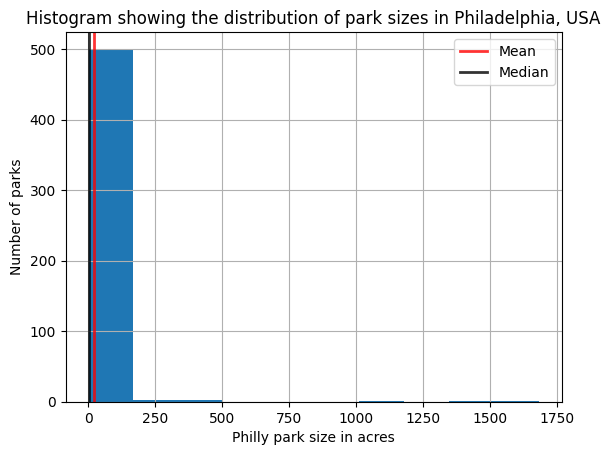

In [11]:
ax = pparks["ACREAGE"].hist(bins = 10)
ax.set_xlabel('Philly park size in acres')
ax.set_ylabel('Number of parks')
ax.set_title('Histogram showing the distribution of park sizes in Philadelphia, USA')
ax.axvline(meanps, color='red', linestyle='solid', linewidth=2, alpha= .8)
ax.axvline(medianps, color='black', linestyle='solid', linewidth=2, alpha= .8)
ax.legend([meanps, medianps], labels = ['Mean', 'Median']);
# you can use the method of the ACREAGE column .hist()
# choose an appropriate number of bins with the argument bins=
# overplot on the histogram the mean and the median of the distribution



#to get the legend to render pass to axvline the argument label="..." with ... being whatever you want displayed


3. Describe what the graph means:


This bar graph shows the number and size of parks in Philadelphia, displaying a line of mean and median. We can see that the majority of parks in Philly are on the smaller side between 1 and 200 acres.

## 4. what is the spread of park sizes?
calculate the standard deviation of the park sized

Remember to manage the decimal places

In [12]:
#Calculating the standard deviation of the park sizes
stdps = round(pparks['ACREAGE'].std(), 3)
print("The standard deviation of the park sizes is", stdps)

The standard deviation of the park sizes is 111.521


### 5. select only a subset of the parks: the pasks smaller than 10 acres
(you can do it similarly to the way we removed "Unknown" from the criminal arrests data in class: set a condition and use it to index the dataframe)

calculate the mean and median and plot a histogram of the park sized with the mean and median indicated on the plot

In [13]:
# if you need help with this step do ask me about boolean arrays used as indices
# and slicing of arrays and series! remember we have a slack channel #hw3

ax = pparks[~(pparks["ACREAGE"]=="Unknown")]["ACREAGE"].unique()
smallparks = pparks.loc[pparks['ACREAGE'] < 10]
smallparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_PROG_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,Joseph O'Connor Memorial Pool,1903,400 S TANEY ST,19146,...,14,5;7,2,9;17,Y,Y,Y,Markward site includes the O'Connor Pool,25871.441406,1094.402639
2,3,Schuylkill River Park,Schuylkill River Park,N,NaN,Schuylkill River Park,NaN,2992,400 S TANEY ST,19146,...,14,"5, 7",2,9,Y,Y,N,NaN,27216.929688,799.048584
15,16,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,...,13,8,3,12,Y,Y,N,NaN,38916.484375,949.498194
16,17,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,...,14,7,2,1,Y,Y,N,NaN,3830.242188,247.032048
17,18,Price Street Play Lot,Price Street Play Lot,N,NaN,Price St,,826,185 W PRICE ST,19144,...,4,4,8,14,Y,Y,N,NaN,1249.839844,143.734003


In [14]:
#calculate the mean and median of the parks with size less than 10 acres
Meansp = smallparks["ACREAGE"].mean()
Mediansp = smallparks["ACREAGE"].median()
print("The mean is: ", Meansp)
print("The median is: ", Mediansp)

The mean is:  2.9414155260847883
The median is:  2.16683947


<ipython-input-15-631ba9ae8b2c>:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([Meansp, Mediansp], labels = ['Mean', 'Median']);


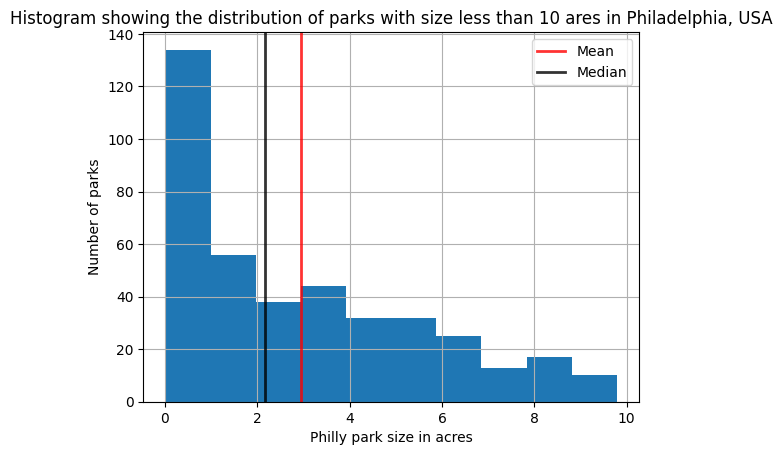

In [15]:
#Plot a histogram of the parks with size less than 10 acres with the mean and median indicated on the plot

ax = smallparks["ACREAGE"].hist(bins = 10)
ax.set_xlabel('Philly park size in acres')
ax.set_ylabel('Number of parks')
ax.set_title('Histogram showing the distribution of parks with size less than 10 ares in Philadelphia, USA')
ax.axvline(Meansp, color='red', linestyle='solid', linewidth=2, alpha= .8)
ax.axvline(Mediansp, color='black', linestyle='solid', linewidth=2, alpha= .8)
ax.legend([Meansp, Mediansp], labels = ['Mean', 'Median']);


6. Imagine that the reader has no access to my instructions, or to the code. What does this figure show? what should the reader note about the figure?

This figure does a great job of providing a reader with enough information and guidance to determine what is being displayed on the graph, even without the instructions or the code being provided they should still be able to understand what is being shown to them.



The parks listed in each row are in some cases subsets of larger parks. The "parent" park is listed under PARENT_NAME.

The challenge is to visualize the distribution of sizes of the  parent parks. To do that you have to aggregate the parks based on the "PARENT_NAME" value and sum the size of the parks. The methods of the dataframe you want to use are
```.groupby()```
and
```.sum()```

In [16]:
# Grouping the Parks based on the parent name
group_park = pparks.groupby(['PARENT_NAME']).sum()
group_park

<ipython-input-16-4bab9352551a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_park = pparks.groupby(['PARENT_NAME']).sum()


,OBJECTID,DPP_ASSET_ID,ZIP_CODE,ACREAGE,Shape__Area,Shape__Length
PARENT_NAME,,,,,,
10th and Lemon Playground,36,2914,19123,0.218885,1509.675781,169.494221
11th and Cecil B Moore Playground,176,1135,19122,5.181666,35754.375000,755.891229
12th and Cambria Playground,254,1800,19133,2.337374,16136.882812,542.995987
18th and Jackson War Memorial,373,1215,19145,0.083383,574.429688,148.363162
22nd and Catharine Park,374,1222,19146,0.046244,318.761719,78.402701
...,...,...,...,...,...,...
Womrath Park,256,120,19124,2.167680,14970.460938,591.724807
Wooden Bridge Run,71,1632,19114,49.095667,339623.484375,4653.000056
Woodside Park,243,1840,19131,2.619728,18088.925781,615.286813


7 Using **sns.pairplot** plot the pairplot of ACREAGE	and Shape__Area variables. What is the relationship that you can see?

In [17]:
# Plotting pairplot

pair = ["ACREAGE", "Shape__Area"]
pair

['ACREAGE', 'Shape__Area']

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


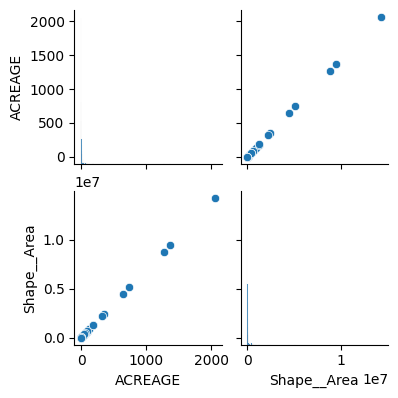

In [18]:
sns.pairplot(group_park[pair], size=2.0)

In [19]:
#Visualize the distribution of the parks grouped by parent name
# Calculate mean and median
groupmean = group_park['ACREAGE'].mean()
groupmedian = group_park['ACREAGE'].median()
print('The Mean of the grouped Parks is:', groupmean)
print('The Median of the grouped Parks is:', groupmedian)

The Mean of the grouped Parks is: 26.124801128015463
The Median of the grouped Parks is: 3.03529379


8. Visualize the distribution of the parks grouped by parent name

<ipython-input-20-856962105d93>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])


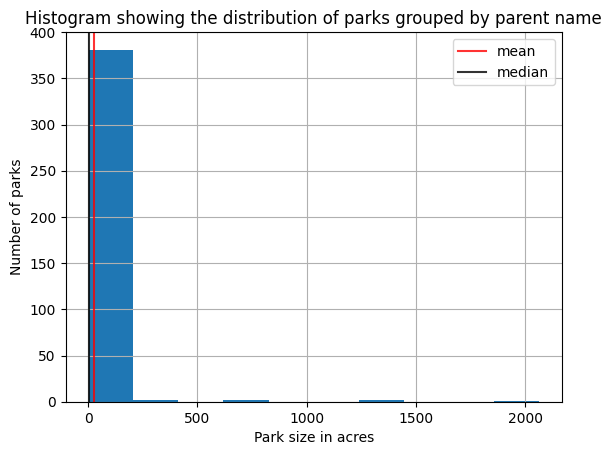

In [20]:
#Visualize the distribution of the parks grouped by parent name

ax = group_park["ACREAGE"].hist(bins = 10)

ax.axvline(groupmean, color='red', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(groupmedian, color='black', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])
ax.set_xlabel('Park size in acres')
ax.set_ylabel('Number of parks')

pylab.title("Histogram showing the distribution of parks grouped by parent name");


9. Explain what the graph means

This graph is showing the parent parks and their sizes.

10. What could you measure about this new dataset obtained by grouping the data by PARENT_NAME that would allow you to investigate further the difference in the two dataset?

In [21]:
# Measuring the standard deviation of the group parks

group_std = round(group_park['ACREAGE'].std(), 3)
print ("The standard deviation of the grouped data set is", group_std)

The standard deviation of the grouped data set is 151.425


11. Exlain what this standard deviation value of 150 mean.

Since this is a large standard deviation, the data is much more spread out.



**END OF HOMEWORK 2**



